In [1]:
%matplotlib inline

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import gym
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
time_steps = 1e6 #testrun
#time_steps = 1000000 #for prod or even more *10?100?
time_steps_test = int(time_steps/100)

from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines import results_plotter
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import TD3
from stable_baselines.td3.policies import MlpPolicy

os.makedirs("logs_test", exist_ok=True)
os.makedirs("logs_train", exist_ok=True)
os.makedirs("logs_tmp", exist_ok=True)
from shutil import copyfile
from utils import *

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



## TD3





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.Dense instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



time_steps_todo: 1000000.0


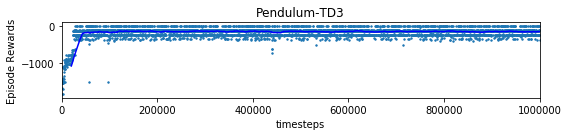

CPU times: user 1h 26min 37s, sys: 9min 47s, total: 1h 36min 24s
Wall time: 1h 5min 14s


In [2]:
%%time
envname="Pendulum-v0"
env = gym.make(envname)
exp_name=env.spec._env_name+'-TD3'

#train
log_dir='logs_train/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = TD3(MlpPolicy, env, verbose=0)

print("time_steps_todo: "+str(time_steps))
model.learn(total_timesteps=int(time_steps))

os.makedirs("models", exist_ok=True)
model.save("models/"+log_dir.split("/")[1])

copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()


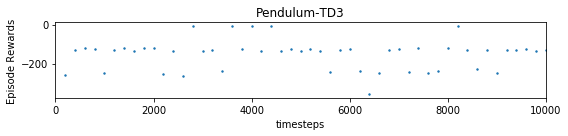

CPU times: user 9.35 s, sys: 612 ms, total: 9.96 s
Wall time: 9.83 s


In [3]:
%%time
#test

env = gym.make(envname)
log_dir='logs_test/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = TD3.load("models/"+log_dir.split("/")[1])
obs = env.reset()
for i in range(time_steps_test):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    #env.render()

copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()


In [4]:
%%time
envname="CarRacing-v0"
#Error: the action space low and high must be symmetric

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 11.2 µs


time_steps_todo: 1000000.0


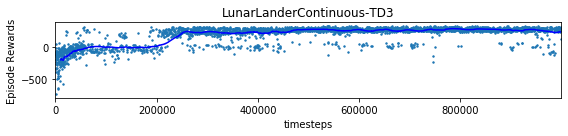

CPU times: user 2h 6min 7s, sys: 12min 21s, total: 2h 18min 28s
Wall time: 1h 46min 25s


In [5]:
%%time
envname="LunarLanderContinuous-v2"
env = gym.make(envname)
exp_name=env.spec._env_name+'-TD3'

#train
log_dir='logs_train/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = TD3(MlpPolicy, env, verbose=0)

print("time_steps_todo: "+str(time_steps))
model.learn(total_timesteps=int(time_steps))

os.makedirs("models", exist_ok=True)
model.save("models/"+log_dir.split("/")[1])

copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()


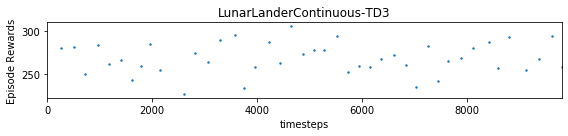

CPU times: user 20.5 s, sys: 903 ms, total: 21.4 s
Wall time: 22.4 s


In [6]:
%%time
#test

env = gym.make(envname)
log_dir='logs_test/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = TD3.load("models/"+log_dir.split("/")[1])
obs = env.reset()
for i in range(time_steps_test):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    #env.render()
    
copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()


time_steps_todo: 1000000.0


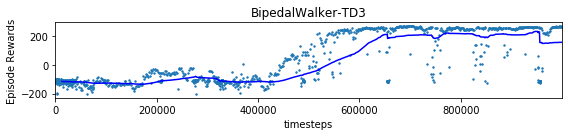

CPU times: user 1h 58min 56s, sys: 12min 46s, total: 2h 11min 43s
Wall time: 1h 35min 9s


In [7]:
%%time
envname="BipedalWalker-v2"
env = gym.make(envname)
exp_name=env.spec._env_name+'-TD3'

#train
log_dir='logs_train/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = TD3(MlpPolicy, env, verbose=0)

print("time_steps_todo: "+str(time_steps))
model.learn(total_timesteps=int(time_steps))

os.makedirs("models", exist_ok=True)
model.save("models/"+log_dir.split("/")[1])

copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()


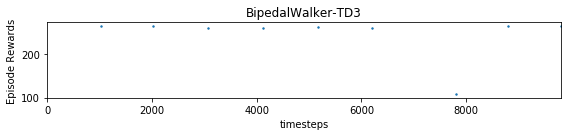

CPU times: user 16.6 s, sys: 685 ms, total: 17.3 s
Wall time: 17.8 s


In [8]:
%%time
#test

env = gym.make(envname)
log_dir='logs_test/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = TD3.load("models/"+log_dir.split("/")[1])
obs = env.reset()
for i in range(time_steps_test):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    #env.render()
    
copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()
